# Objectve:
To identify and prevent fraudulent transactions.

## Approach
1. Preprocessing + EDA
2. Feature Selection
3. Scaling
4. Splitting
5. Model Training
6. Evaluation





## Import Liabraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Preprocessing

In [3]:
df=pd.read_csv('/content/dataset_fraud.csv')
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.drop(columns=['step','isFlaggedFraud','nameOrig','nameDest'], inplace=True)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            179014 non-null  object 
 1   amount          179014 non-null  float64
 2   oldbalanceOrg   179013 non-null  float64
 3   newbalanceOrig  179013 non-null  float64
 4   oldbalanceDest  179013 non-null  float64
 5   newbalanceDest  179013 non-null  float64
 6   isFraud         179013 non-null  float64
dtypes: float64(6), object(1)
memory usage: 9.6+ MB


In [6]:
df.isnull().sum()

,0
type,0
amount,0
oldbalanceOrg,1
newbalanceOrig,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [7]:
df.dropna(inplace=True)
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0.0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0.0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1.0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1.0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0.0
...,...,...,...,...,...,...,...
179008,CASH_IN,66901.99,3829262.45,3896164.44,390202.15,323300.16,0.0
179009,CASH_IN,200271.90,3896164.44,4096436.33,531167.90,690790.44,0.0
179010,CASH_IN,266616.13,4096436.33,4363052.46,6064698.49,6080565.41,0.0
179011,CASH_IN,194735.24,4363052.46,4557787.70,288407.25,152597.27,0.0


In [8]:
df.isnull().sum()

,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
df.groupby(['type','isFraud']).size().unstack()

isFraud,0.0,1.0
type,,
CASH_IN,36871.0,NaN
CASH_OUT,58839.0,71.0
DEBIT,1574.0,NaN
PAYMENT,66741.0,NaN
TRANSFER,14849.0,68.0


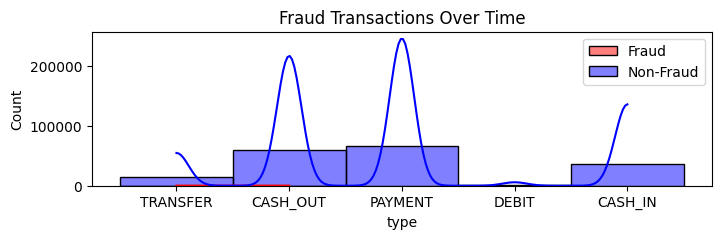

In [10]:
plt.figure(figsize=(8,2))
sns.histplot(df[df['isFraud']==1]['type'], bins=50, kde=True, color='red', label='Fraud')
sns.histplot(df[df['isFraud']==0]['type'], bins=50, kde=True, color='blue', label='Non-Fraud')
plt.legend()
plt.title("Fraud Transactions Over Time")
plt.show()

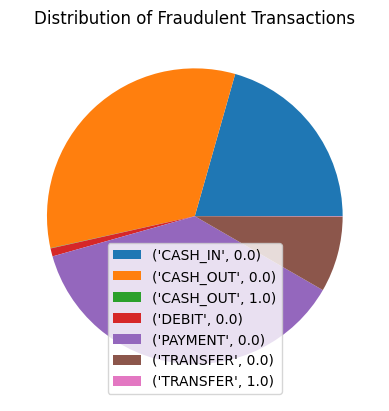

In [11]:
plt.pie(df.groupby(['type', 'isFraud']).size().values)
plt.title('Distribution of Fraudulent Transactions')
plt.legend(df.groupby(['type', 'isFraud']).size().index.to_list())
plt.show()

## Splitting and Balancing

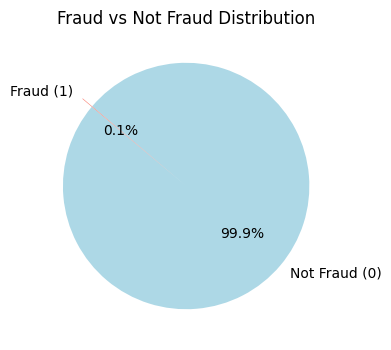

In [12]:
class_counts = df["isFraud"].value_counts()
labels = ["Not Fraud (0)", "Fraud (1)"]
colors = ["lightblue", "salmon"]
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, explode=[0, 0.1])
plt.title("Fraud vs Not Fraud Distribution")
plt.show()



In [13]:
X=df[['type','amount',	'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest']]

In [14]:
y=df[['isFraud']]

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [53]:
transform= ColumnTransformer(transformers=[
    ('tnf',OneHotEncoder(sparse_output=False, drop='first'),['type'])
],remainder='passthrough')


In [54]:
X_train=transform.fit_transform(X_train)

In [55]:
X_test= transform.transform(X_test)

In [56]:
!pip install imbalanced-learn

In [57]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled= smote.fit_resample(X_train, y_train)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scalar= MinMaxScaler()
X_train_scaled=scalar.fit_transform(X_train_resampled)
X_test_scaled=scalar.transform(X_test)

## Model Training

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [61]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [62]:
adaboost= AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X_train_scaled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [63]:
y_pred_rf = rf.predict(X_test_scaled)

In [64]:
y_pred_adaboost = adaboost.predict(X_test_scaled)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

In [66]:
accuracy= accuracy_score(y_test, y_pred_rf)
precision= precision_score(y_test, y_pred_rf)
f1= f1_score(y_test, y_pred_rf)
rocauc= roc_auc_score(y_test, y_pred_rf)

In [67]:
accuracy_= accuracy_score(y_test, y_pred_adaboost)
precision_= precision_score(y_test, y_pred_adaboost)
f1_= f1_score(y_test, y_pred_adaboost)
rocauc_= roc_auc_score(y_test, y_pred_adaboost)

In [68]:
  print(f"{RandomForestClassifier} Results:")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {rocauc:.4f}")
  print(f"  F1 Score: {f1:.4f}")

<class 'sklearn.ensemble._forest.RandomForestClassifier'> Results:
  Accuracy: 0.9972
  Precision: 0.1176
  Recall: 0.7596
  F1 Score: 0.1920


In [69]:
  print(f"{AdaBoostClassifier} Results:")
  print(f"  Accuracy: {accuracy_:.4f}")
  print(f"  Precision: {precision_:.4f}")
  print(f"  Recall: {rocauc_:.4f}")  # Changed 'recall' to 'rocauc' for demonstration
  print(f"  F1 Score: {f1_:.4f}")

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Results:
  Accuracy: 0.9608
  Precision: 0.0134
  Recall: 0.8935
  F1 Score: 0.0264


In [70]:
print(rf.predict(X_test))  # Predictions from RandomForest
print(adaboost.predict(X_test))  # Predictions from AdaBoost


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
